model                  rejector     p      time            f1 macro  \
                                               mean       std      mean   
0      RE  DecisionTreeClassifier_4  0.00  0.021128  0.000254  0.677020   
1      RE  DecisionTreeClassifier_4  0.25  0.043791  0.005097  0.678625   
2      RE  DecisionTreeClassifier_4  0.50  0.082626  0.006907  0.747500   
3      RE  DecisionTreeClassifier_4  0.75  0.091034  0.002472  0.768584   
4      RE  DecisionTreeClassifier_4  1.00  0.020167  0.000046  0.772546   
5   REwOC  DecisionTreeClassifier_4  0.00  0.029629  0.000847  0.677020   
6   REwOC  DecisionTreeClassifier_4  0.25  0.047321  0.001628  0.707219   
7   REwOC  DecisionTreeClassifier_4  0.50  0.059340  0.001209  0.731316   
8   REwOC  DecisionTreeClassifier_4  0.75  0.072384  0.000510  0.751763   
9   REwOC  DecisionTreeClassifier_4  1.00  0.085449  0.000119  0.772546   
10    big                       NaN  0.00  0.020982  0.000117  0.772546   
11  small                       NaN  0.00  0.021087  0.000240  0.677020   

             f1 micro           accuracy  ...         power               \
         std     mean       std     mean  ...          mean          std   
0   0.002069   0.6780  0.003111   0.6780  ...  12981.145570   380.790428   
1   0.000206   0.6799  0.001273   0.6799  ...  12140.000000   376.503033   
2   0.011988   0.7498  0.012728   0.7498  ...  21092.443038  1845.691910   
3   0.006827   0.7710  0.007637   0.7710  ...  24121.645570   786.803981   
4   0.008755   0.7750  0.009334   0.7750  ...  28525.658228   624.760169   
5   0.002069   0.6780  0.003111   0.6780  ...  11373.721519   262.435074   
6   0.005438   0.7093  0.005798   0.7093  ...  18634.012658   117.791459   
7   0.008387   0.7334  0.008485   0.7334  ...  21690.443038   351.637937   
8   0.013338   0.7540  0.013294   0.7540  ...  23739.360759   654.879337   
9   0.008755   0.7750  0.009334   0.7750  ...  26439.632911    83.993545   
10  0.008755   0.7750  0.009334   0.7750  ...  27621.651899   164.433654   
11  0.002069   0.6780  0.003111   0.6780  ...  11916.772152   337.030364   

       power_avg                  preal                pmin            \
            mean          std      mean       std      mean       std   
0   12638.006329   367.310645  0.000000  0.000000  0.000000  0.000000   
1   10826.481013   188.162010  0.021559  0.003357  0.000000  0.000000   
2   18574.575949  1292.671752  0.644581  0.073564  0.492188  0.077340   
3   21512.449367   525.577254  0.948576  0.013426  0.867188  0.033146   
4   24815.449367   474.468650  1.000000  0.000000  1.000000  0.000000   
5   10112.379747   362.128179  0.000000  0.000000  0.000000  0.000000   
6   21037.601266   253.672320  0.250000  0.000000  0.250000  0.000000   
7   19228.006329   472.123562  0.500000  0.000000  0.500000  0.000000   
8   23126.253165   832.237829  0.750000  0.000000  0.750000  0.000000   
9   26261.354430    71.641553  1.000000  0.000000  1.000000  0.000000   
10  23919.645570   232.521772  1.000000  0.000000  1.000000  0.000000   
11  12107.759494   382.517916  0.000000  0.000000  0.000000  0.000000   

        pmax            
        mean       std  
0   0.000000  0.000000  
1   0.085938  0.011049  
2   0.789062  0.033146  
3   1.000000  0.000000  
4   1.000000  0.000000  
5   0.000000  0.000000  
6   0.250000  0.000000  
7   0.500000  0.000000  
8   0.750000  0.000000  
9   1.000000  0.000000  
10  1.000000  0.000000  
11  0.000000  0.000000  

[12 rows x 21 columns]

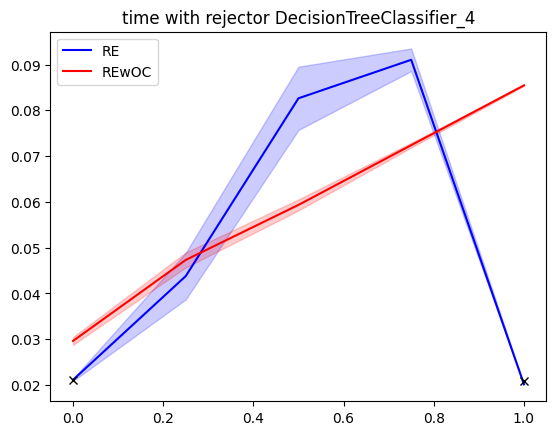

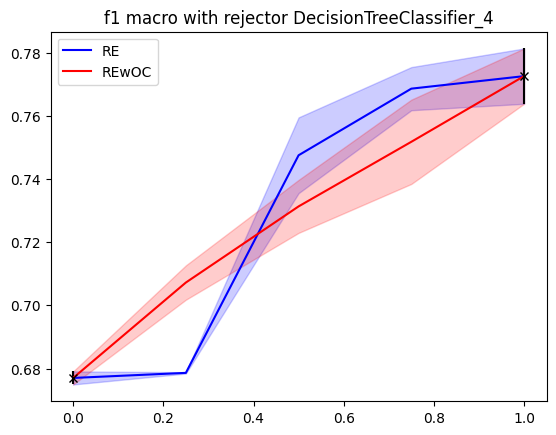

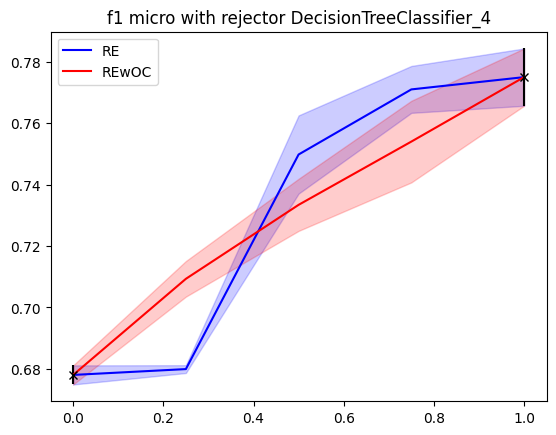

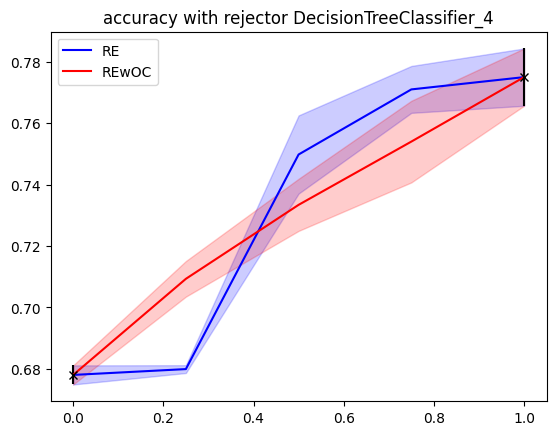

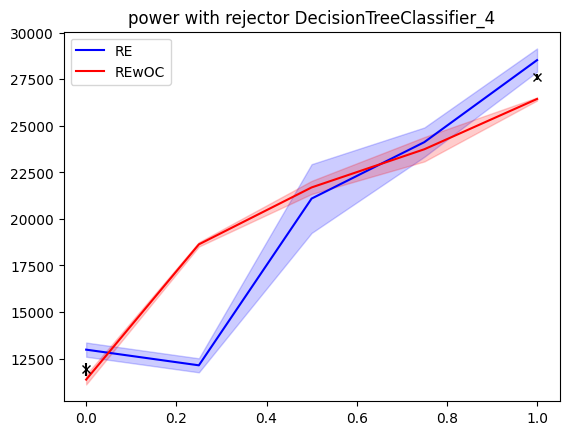

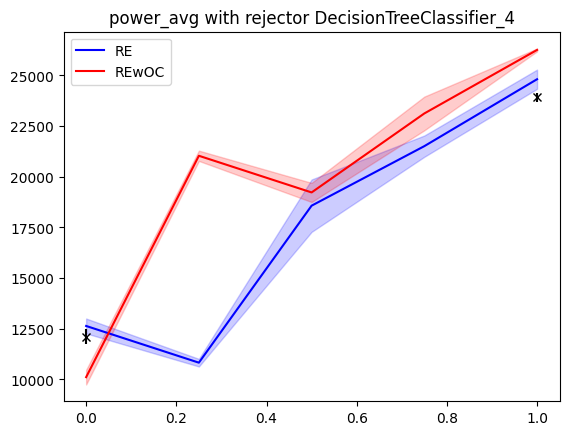

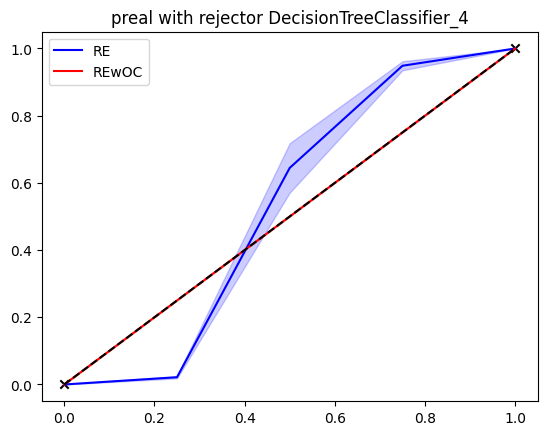

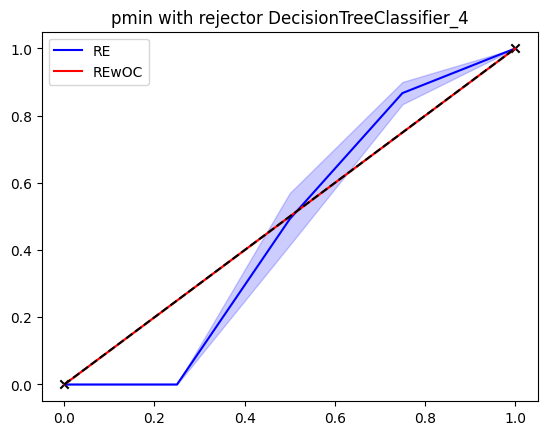

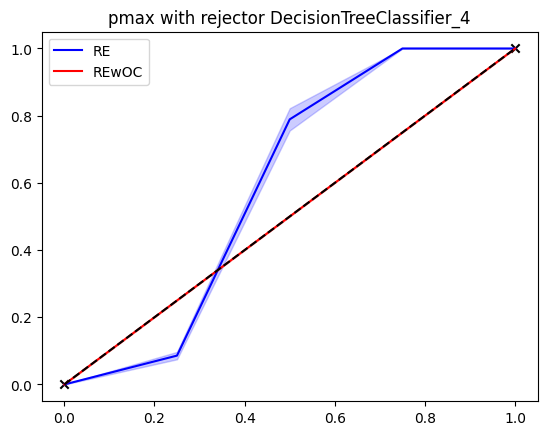

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.patches import PathPatch
from matplotlib.path import Path

def draw_error_band(ax, x, y, err, **kwargs):
    # Calculate normals via centered finite differences (except the first point
    # which uses a forward difference and the last point which uses a backward
    # difference).
    dx = np.concatenate([[x[1] - x[0]], x[2:] - x[:-2], [x[-1] - x[-2]]])
    dy = np.concatenate([[y[1] - y[0]], y[2:] - y[:-2], [y[-1] - y[-2]]])
    l = np.hypot(dx, dy)
    nx = dy / l
    ny = -dx / l

    # end points of errors
    xp = x + nx * err
    yp = y + ny * err
    xn = x - nx * err
    yn = y - ny * err

    vertices = np.block([[xp, xn[::-1]],
                         [yp, yn[::-1]]]).T
    codes = np.full(len(vertices), Path.LINETO)
    codes[0] = codes[len(xp)] = Path.MOVETO
    path = Path(vertices, codes)
    ax.add_patch(PathPatch(path, **kwargs))


df = pd.read_csv("imagenet.csv", )
agg = {
    "time":['mean','std'],
    "f1 macro":['mean','std'],
    "f1 micro":['mean','std'],
    "accuracy":['mean','std'],
    "power":['mean','std'],
    "power_avg":['mean','std'],
    "preal":['mean','std'],
    "pmin":['mean','std'],
    "pmax":['mean','std'],
}

df = df.groupby(["model", "rejector", "p"], dropna=False).agg(agg)
# dff.columns = dff.columns.get_level_values(0)
df.reset_index(inplace=True)
display(df)

# asd
for m in df["rejector"].dropna().unique():
    # if np.isnan(m):
    #     continue

    dff = df[df["rejector"] == m]
    for key in agg.keys():
        ysmall = df[df["model"] == "small"][key]["mean"].values[0]
        ysmall_std = df[df["model"] == "small"][key]["std"].values[0]
        ybig = df[df["model"] == "big"][key]["mean"].values[0]
        ybig_std = df[df["model"] == "big"][key]["std"].values[0]

        plt.title(f"{key} with rejector {m}")
        if ysmall_std > 0 and ybig_std > 0:
            plt.errorbar([0, 1], [ysmall, ybig], yerr = [ysmall_std, ybig_std], c = "k", fmt='x')
        else:
            plt.scatter([0, 1], [ysmall, ybig], c = "k", marker='x')
        plt.plot(dff[dff["model"] == "RE"]["p"], dff[dff["model"] == "RE"][key]["mean"], c = "b", label="RE")
        plt.plot(dff[dff["model"] == "REwOC"]["p"], dff[dff["model"] == "REwOC"][key]["mean"], c = "r", label="REwOC")

        if key == "preal" or key == "pmin" or key == "pmax":
            plt.plot([0,1],[0,1], c="k", linestyle="--")

        plt.fill_between(dff[dff["model"] == "RE"]["p"], dff[dff["model"] == "RE"][key]["mean"] - dff[dff["model"] == "RE"][key]["std"], dff[dff["model"] == "RE"][key]["mean"] + dff[dff["model"] == "RE"][key]["std"],color='blue', alpha=0.2)
        plt.fill_between(dff[dff["model"] == "REwOC"]["p"], dff[dff["model"] == "REwOC"][key]["mean"] - dff[dff["model"] == "REwOC"][key]["std"], dff[dff["model"] == "REwOC"][key]["mean"] + dff[dff["model"] == "REwOC"][key]["std"],color='red', alpha=0.2)
        plt.legend(loc='upper left')
        plt.show()

#dff
#dff[dff["model"] == "RE"]
# dff["time","f1 macro","f1 micro", "accuracy"]
#df.groupby(["model", "p"])["time","f1 macro","f1 micro", "accuracy"].std()

In [34]:
[x for x in df["rejector"].dropna().unique()]

['DecisionTreeClassifier_12', 'DecisionTreeClassifier_4']